# Chewing data efficiently with NumPy and intelligently with SciPy

# Checking System Version

In [1]:
import sys
sys.version

'3.10.5 (main, Jun  6 2022, 18:49:26) [GCC 12.1.0]'

## Learning Numpy

In [2]:
import numpy
numpy.version.full_version

'1.22.4'

In [3]:
# from numpy import * # Pullutes the namespace

### Import numpy using shortcut np instead of polluting the namespace

In [4]:
import numpy as np

In [6]:
a = np.array([0, 1, 2, 3, 4, 5])

In [7]:
a

array([0, 1, 2, 3, 4, 5])

In [8]:
a.ndim

1

In [9]:
a.shape

(6,)

In [10]:
b = a.reshape((3, 2))

In [11]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [12]:
b.ndim

2

In [13]:
b.shape

(3, 2)

In [14]:
b[1][0] = 77

In [15]:
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [16]:
# Changing the value in b changes the original value in a as well
a

array([ 0,  1, 77,  3,  4,  5])

In [17]:
# To instead make a separate copy of the array
c = a.reshape((3, 2)).copy()

In [18]:
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [19]:
c[0][0] = -99

In [20]:
a

array([ 0,  1, 77,  3,  4,  5])

In [21]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

Operations are propagated to the individual elements in NumPy arrays.

In [22]:
d = np.array([1, 2, 3, 4, 5])

In [23]:
d * 2

array([ 2,  4,  6,  8, 10])

In [24]:
d ** 2

array([ 1,  4,  9, 16, 25])

Operations in regular python lists are not propagated.

In [25]:
[1, 2, 3, 4, 5] * 2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [26]:
[1, 2, 3, 4, 5] ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

But the insertion and removal of elements are a bit difficult. Right type of data structure is used for different purposes.

### Indexing

In [27]:
a

array([ 0,  1, 77,  3,  4,  5])

In [28]:
a[np.array([2, 3, 4])]

array([77,  3,  4])

In [29]:
# It also supports normal indexing as in regular python lists.
a[1]

1

In [30]:
# Conditions are also propagated to individual elements.
a > 4

array([False, False,  True, False, False,  True])

In [31]:
a[a>4]

array([77,  5])

In [32]:
# We can also trim outliers using the following conditions
a[a > 4] = 4
a

array([0, 1, 4, 3, 4, 4])

In [33]:
# Using clip function for clipping the values at both the ends of an interval
a.clip(0, 4)

array([0, 1, 4, 3, 4, 4])

In [34]:
a.clip(2, 3)

array([2, 2, 3, 3, 3, 3])

## Handling non-existent values

In [36]:
c = np.array([1, 2, np.NAN, 3, 4]) # NAN -> Not a real number

In [37]:
np.isnan(c)

array([False, False,  True, False, False])

In [38]:
# Use of ~ (tilde) and isnan function to get only the numbers from the numpy array
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [39]:
# Calculate the mean of the above array with NAN element removed
# (1 + 2 + 3 + 4) / 4
np.mean(c[~np.isnan(c)])

2.5

## Comparing the runtime

Computing the sum of all squared numbers from 1 to 1000 for 10000 times and recording the time performance using Numpy arrays and regular python lists.

In [40]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range (1000))', number=10000)
naive_np_sec = timeit.timeit('sum(na*na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)', setup="import numpy as np; na=np.arange(1000)", number=10000)

print(f"Normal Python: {normal_py_sec} sec")
print(f"Naive Numpy: {naive_np_sec} sec")
print(f"Good Numpy: {good_np_sec} sec")

Normal Python: 1.0374922280002465 sec
Naive Numpy: 1.2742298620000838 sec
Good Numpy: 0.02833575699969515 sec


Although Numpy Arrays are fast, the downside to python lists are that only one type of data can be stored in numpy arrays as opposed to python lists which can hold different data types in the same list.

In [41]:
# Getting datatype in numpy
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

But NumPy tries to convert the array to best possible data type when different data types are placed in the array

In [42]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U21')

In [43]:
np.array([1, "stringy", {1, 2, 3}])

array([1, 'stringy', {1, 2, 3}], dtype=object)

# Learning SciPy

In [44]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [45]:
import scipy, numpy

In [46]:
scipy.version.full_version

'1.8.1'

In [47]:
scipy.dot is numpy.dot

False

### Reading in the data

We read in the dataset provided.

In [48]:
data = np.genfromtxt("web_traffic.tsv", delimiter="\t")

In [49]:
print(data[:10]) # print upto 10 records from the dataset

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]]


In [50]:
print(data.shape)

(743, 2)


### Preprocessing and cleaning the data

In [51]:
# splitting the data into two vectors, namely hours and web bits in the particular hours
x = data[:,0]
y = data[:,1]

In [52]:
x[:10]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [53]:
y[:10]

array([2273.331055, 1657.255493,         nan, 1366.846436, 1489.234375,
       1338.02002 , 1884.647339, 2284.75415 , 1335.810913, 1025.832397])

In [54]:
# get the number of values in y which has NAN
np.sum(np.isnan(y))

8

In [55]:
# filtering out the NAN values from y vector and the corresponding data from x vector
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

In [56]:
x

array([  1.,   2.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.,  97.,  98.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
       115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 149., 150., 151., 152., 153., 154., 15

In [57]:
y

array([2273.331055, 1657.255493, 1366.846436, 1489.234375, 1338.02002 ,
       1884.647339, 2284.75415 , 1335.810913, 1025.832397, 1140.241089,
       1478.341797, 1204.218384, 1312.506348, 1300.218872, 1495.334717,
       1161.070801, 1366.701904, 1273.441162, 1246.935425, 1072.582886,
       1877.628296, 1403.939697,  926.635559, 1534.334595, 2105.287109,
       2114.336182, 1994.525146, 1046.091919, 2091.849854, 2227.968018,
       1414.702515, 1719.032471, 1722.046875, 1293.547974, 1840.270752,
       2542.300781, 1609.983643, 2456.552246, 1929.89917 , 1767.186646,
       1204.809082, 1762.48584 , 1724.805054, 2161.871338,  809.148987,
       1323.292603, 1810.368774, 1934.512695, 1352.38501 , 2014.328369,
       1208.587036, 2171.869629, 1701.173584, 1900.717651, 1758.676025,
       1477.506836, 1922.072266, 1972.81543 , 1811.206665, 1367.138306,
       1775.942993, 1689.12085 , 1707.929565, 1354.767578, 1318.591553,
       1513.624146, 2430.133789, 1788.733276, 1381.874512, 1358.

In [58]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [80]:
# Plotting out the data

import matplotlib.pyplot as plt

def plot_web_traffic(x, y, models=None, mx=None, ymax=None):
    plt.figure(figsize=(12, 6)) # width and height of the plot in inches
    plt.scatter(x, y, s=10)
    plt.title("Web Traffic over the last month")
    
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(5)], [f"week {w+1}" for w in range(5)])
    if models:
        colors = ['g', 'k', 'b', 'm', 'r']
        linestyles = ['-', '-.', '--', ':', '-']
        mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        plt.legend(["data"]+[f"d={m.order}" for m in models], loc="upper left")
        plt.autoscale(tight=True)
        plt.ylim(ymin=0)
        if ymax:
            plt.ylim(ymax=ymax)
        plt.grid()

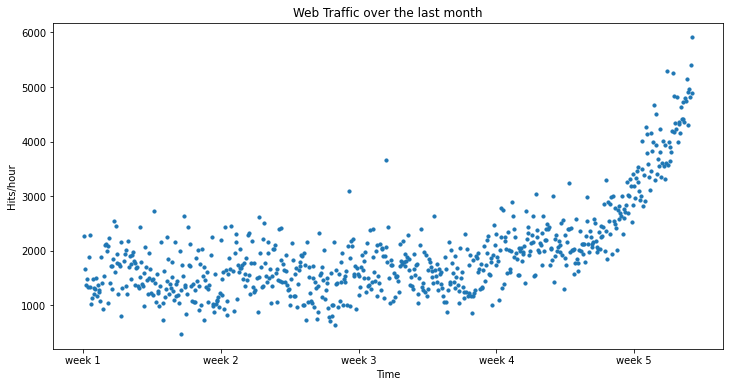

In [60]:
plot_web_traffic(x, y)

In regular command line environment, we'd have used `plt.savefig("web_traffic.png")` to save the figure.

## Before building our first model

To choose a correct model from among different choices of models, we compute the approximation error and then choose the model with the least error.

To compute the error, we use:

```py
def error(f, x, y):
    return np.sum((f(x)-y)**2)
```

In [61]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

### Assuming the model is a straight line

In [62]:
fp1 = np.polyfit(x, y, 1)
# returns the parameter of the fitted model function
print(f"Model parameters {fp1}")

Model parameters [  2.58462016 996.50674246]


The above info suggests that the straight line fitting the data is represented by `f(x) = 2.58462016 * x + 996.50674246`

In [63]:
f1 = np.poly1d(fp1) # creates a model from the model parameters
print(error(f1, x, y))

319531507.0208318


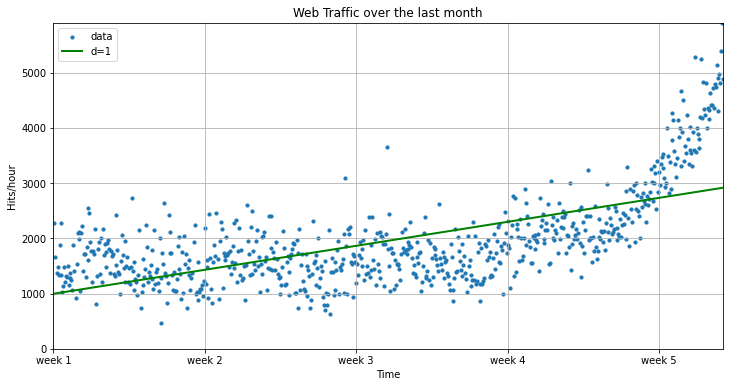

In [64]:
plot_web_traffic(x, y, [f1])

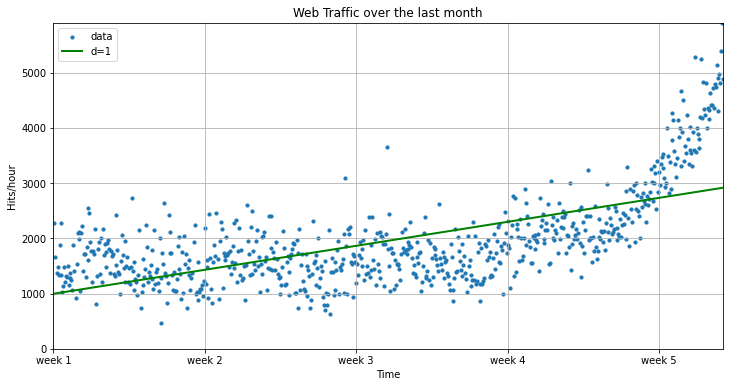

In [65]:
# Plotting the model against the dataset
plot_web_traffic(x, y, [f1])

Since this linear model does not seem to be correctly fitting the dataset at first glance, we move towards more complex model and use the error parameters for each model to choose the most appropriate model.

In [67]:
f2p = np.polyfit(x, y, 2)
print(f2p)
f2 = np.poly1d(f2p)
print(error(f2, x, y))

[ 1.05605675e-02 -5.29774287e+00  1.98466917e+03]
181347660.75761026


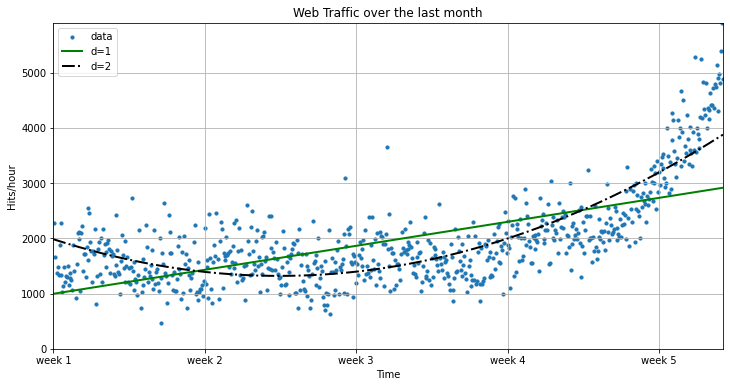

In [68]:
# Plotting the dataset versus the linear model 
# and the model using bpolynomial with degree 2
plot_web_traffic(x, y, [f1, f2])

It can be observed that the second model fits the dataset well as compared to the earlier model.

In [69]:
print(error(f2, x, y)/error(f1, x, y))

0.5675423448798973


The error using f2 is more than half of that using f1.

The model now is `f(x) = 0.0105605675 * x**2 - 5.29774287 * x + 1984.66917`. Although it fits the dataset correctly as compared to the linear models, it has more complex function as compared to the linear model.

For degrees 3, 10 and 100, we need to follow the same concept.

In [70]:
f3p = np.polyfit(x, y, 3)
print(f3p)
f3 = np.poly1d(f3p)
print(error(f3, x, y))

[ 3.05399378e-05 -2.36080711e-02  4.92276689e+00  1.34264140e+03]
140576460.87968162


In [71]:
f10p = np.polyfit(x, y, 10)
print(f10p)
f10 = np.poly1d(f10p)
print(error(f10, x, y))

[-3.56795372e-22  1.29677024e-18 -2.02691211e-15  1.78687320e-12
 -9.78528321e-10  3.44941735e-07 -7.81310594e-05  1.09284671e-02
 -8.55398402e-01  2.98398715e+01  1.31312756e+03]
123426935.7517737


In [73]:
f100p = np.polyfit(x, y, 100)
print(f100p)
f100 = np.poly1d(f100p)
print(error(f100, x, y))

[ 0.00000000e+000  0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000 -0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -0.00000000e+000  0.00000000e+000
 -0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000 -6.21005087e-140
  1.10031121e-136 -3.81629749e-135 -4.27072931e-131 -2.35399149e-128
  1.82552884e-126  1.26399166e-122  1.06801569e-119  4.06248971e-117
 -1.29323320e-114 -3.41074942e-111

/home/shreyam/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


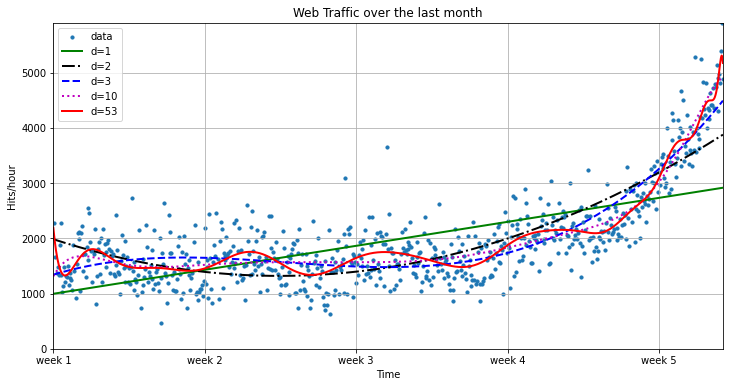

In [75]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100])

In [76]:
# Plotting the errors for the different models built above
for f in [f1, f2, f3, f10, f100]:
    print(f"d={f.order}: {error(f, x, y)}")

d=1: 319531507.0208318
d=2: 181347660.75761026
d=3: 140576460.87968162
d=10: 123426935.7517737
d=53: 110768258.82925361


The models 10 and 53 are oscillating too much and in addition to capturing the underlying process for data generation, they also capture the noise. This is known as **overfitting**.

## Stepping back to go forward

In [77]:
inflection = int(3.5*7*24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]
fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print(f"Error inflection = {fa_error + fb_error}")

Error inflection = 134390576.31295496


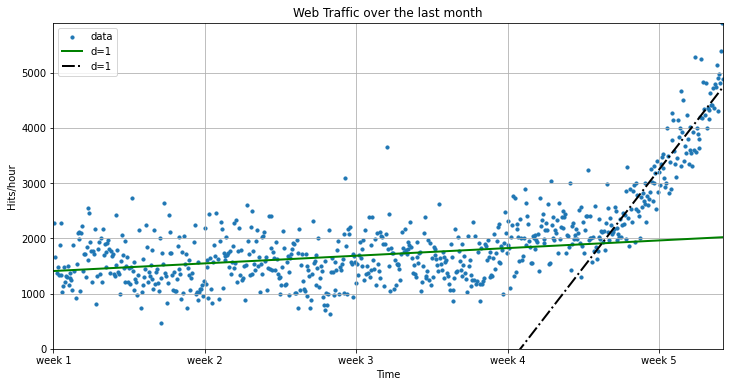

In [78]:
plot_web_traffic(x, y, [fa, fb])

/home/shreyam/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/shreyam/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errors for only the time after inflection point
	d=1: 22140590.599277068
	d=2: 19764355.66056575
	d=3: 19762196.404684328
	d=10: 18942545.44647243
	d=53: 18293795.229235858


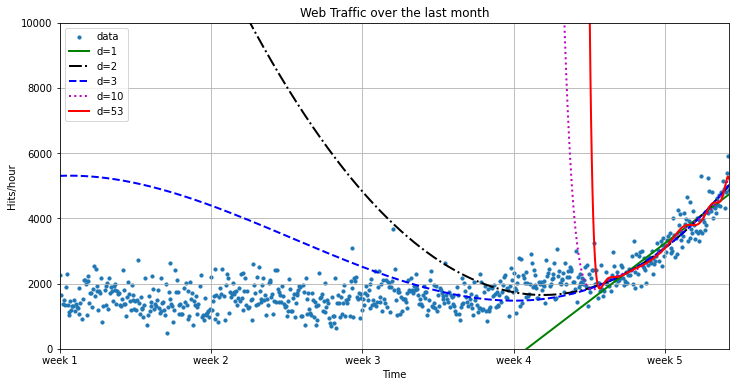

In [79]:
fb1 = np.poly1d(np.polyfit(xb, yb, 1))
fb2 = np.poly1d(np.polyfit(xb, yb, 2))
fb3 = np.poly1d(np.polyfit(xb, yb, 3))
fb10 = np.poly1d(np.polyfit(xb, yb, 10))
fb100 = np.poly1d(np.polyfit(xb, yb, 100))
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
   print(f"\td={f.order}: {error(f, xb, yb)}")
plot_web_traffic(x, y, [fb1, fb2, fb3, fb10, fb100],
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000)

On the other hand, the lower degree models seem not to be capable of capturing the data well
enough. This is called **underfitting**.

## Splitting Training and Testing data

We will use 30% of the data as testing data.

In [82]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = np.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = np.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print(f"fbt2(x)={fbt2}")
print(f"fbt2(x)-100,000={fbt2-100000}")
fbt3 = np.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = np.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = np.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print(f"Error d={f.order}: {error(f, xb[test], yb[test])}")

fbt2(x)=         2
0.09368 x - 104.2 x + 3.078e+04
fbt2(x)-100,000=         2
0.09368 x - 104.2 x - 6.922e+04
Test errors for only the time after inflection point
Error d=1: 3729903.3096372993
Error d=2: 3837651.8142984966
Error d=3: 3839845.7059684875
Error d=10: 4977565.0055813445
Error d=53: 10044497.480674172


/home/shreyam/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/shreyam/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errors for only the time after inflection point
	d=1: 22140590.599277068
	d=2: 19764355.66056575
	d=3: 19762196.404684328
	d=10: 18942545.44647243
	d=53: 18293795.229235858


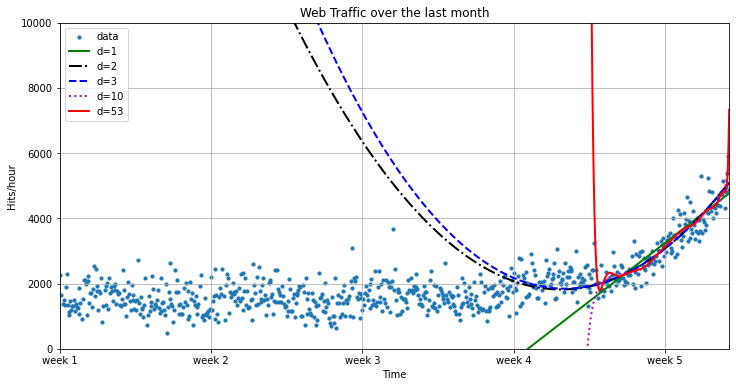

In [86]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print(f"\td={f.order}: {error(f, xb, yb)}")

plot_web_traffic(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],    
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000
)

## Answering Our Initial Question

In [88]:
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print(f"fbt2(x)= n{fbt2}")
print(f"fbt2(x)-100,000= n{fbt2-100000}") 
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print(f"100,000 hits/hour expected at week: {reached_max[0]}") 

fbt2(x)= n         2
0.09368 x - 104.2 x + 3.078e+04
fbt2(x)-100,000= n         2
0.09368 x - 104.2 x - 6.922e+04
100,000 hits/hour expected at week: 9.403444208999005
